In [1]:
import pybamm

In [2]:
models = [
    pybamm.lithium_ion.SPM(),
    pybamm.lithium_ion.SPMe(),
    pybamm.lithium_ion.DFN(),
]

## Chen 2020

Here are the simulations for the Chen 2020 (LG M50) parameter set. This parameter set can be pushed to about 2.1C without getting electrolyte depletion.

In [3]:
param = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)

In [4]:
sims = []
C_rate = 2.1
for model in models:
    sim = pybamm.Simulation(model, parameter_values=param, C_rate=C_rate)
    sim.solve([0, 3700 / C_rate])
    sims.append(sim)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../c

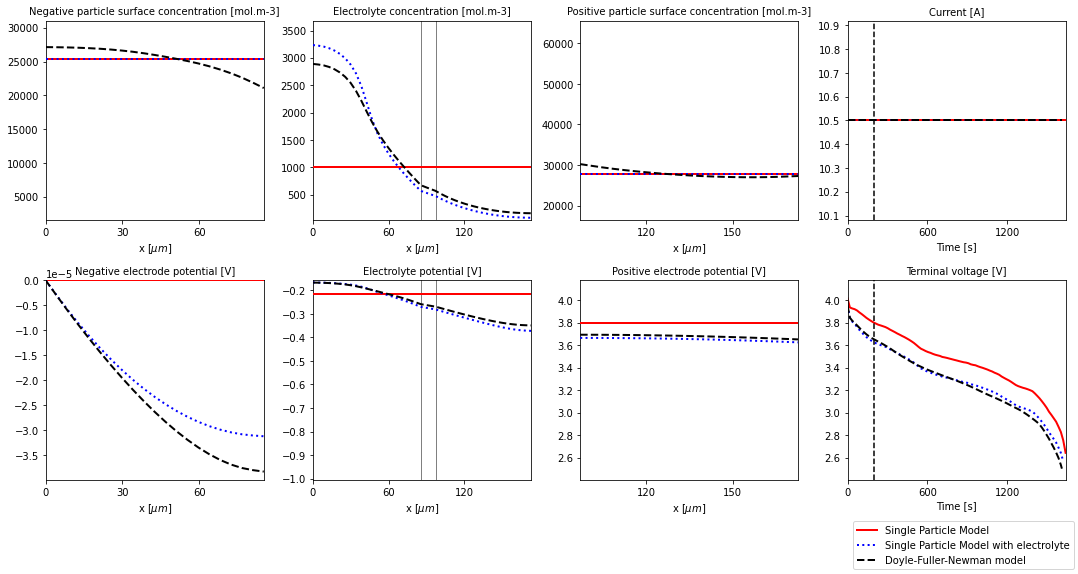

In [5]:
plot = pybamm.QuickPlot(sims, time_unit="seconds")
plot.plot(200)
plot.fig.savefig("img/comparison_Chen2020.png", dpi=300)

In [6]:
plot = pybamm.dynamic_plot(sims, output_variables=["Terminal voltage [V]"], time_unit="seconds")
plot.fig.savefig("img/voltage_Chen2020.png", dpi=300)

interactive(children=(FloatSlider(value=0.0, description='t', max=1637.3256373256372, step=16.37325637325637),…

## Ecker 2015

Here are the simulations for the Ecker 2015 parameter set. This one can be pushed to about 11C without getting electrolyte depletion. 

In [7]:
param = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Ecker2015)

In [8]:
sims = []
C_rate = 11
for model in models:
    sim = pybamm.Simulation(model, parameter_values=param, C_rate=C_rate)
    sim.solve([0, 3700 / C_rate])
    sims.append(sim)

At t = 0.0118384, , mxstep steps taken before reaching tout.
At t = 0.0118384, , mxstep steps taken before reaching tout.
At t = 0.0118384, , mxstep steps taken before reaching tout.


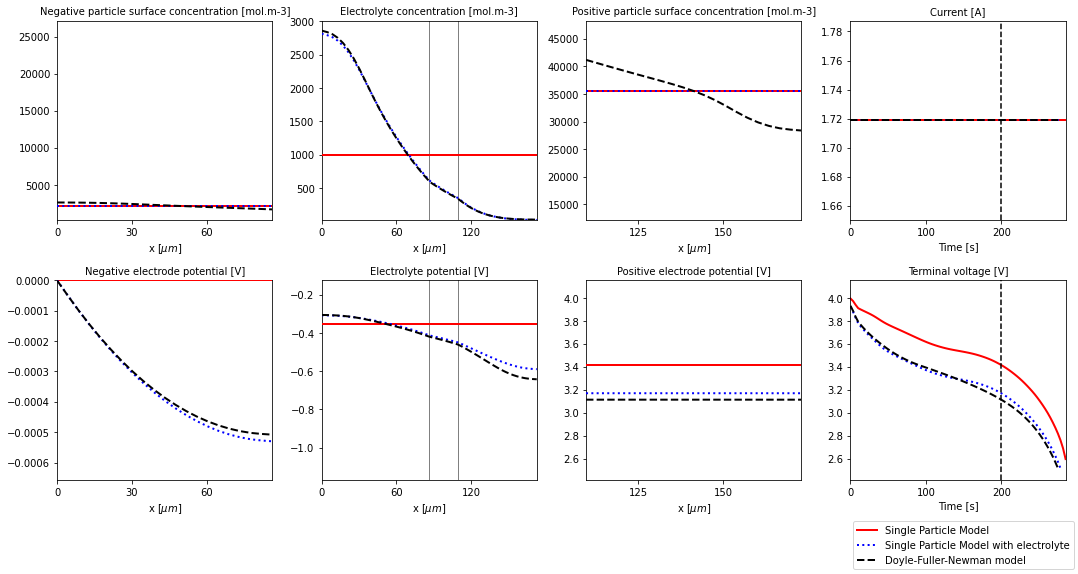

In [9]:
plot = pybamm.QuickPlot(sims, time_unit="seconds")
plot.plot(200)
plot.fig.savefig("img/comparison_Ecker2015.png", dpi=300)

In [10]:
plot = pybamm.dynamic_plot(sims, output_variables=["Terminal voltage [V]"], time_unit="seconds")
plot.fig.savefig("img/voltage_Ecker2015.png", dpi=300)

interactive(children=(FloatSlider(value=0.0, description='t', max=285.3994490358127, step=2.853994490358127), …

Ferran: Despite the difference in absolute C-rate, they both similar agreement between the different models so I don't think one of them does a better job showing the effects we want to capture.